In [1339]:
import numpy as np
import matplotlib.pyplot as plt

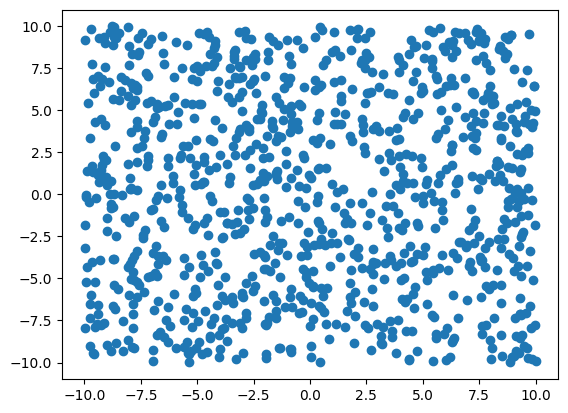

In [1340]:
#multilayer perceptron

#creating dataset
x=np.random.uniform(-10,10,1000)
y=np.random.uniform(-10,10,1000)
plt.scatter(x,y)



(-11.0, 11.0)

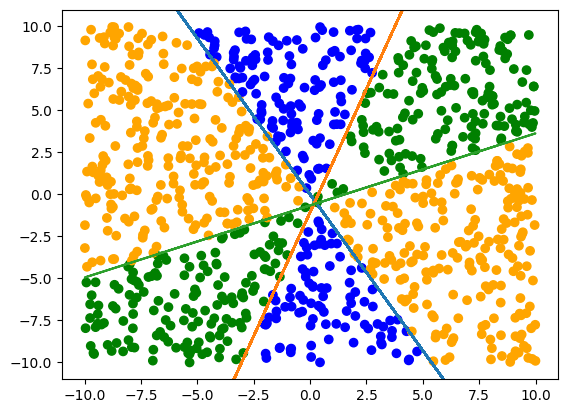

In [1341]:


#random bias
b=np.random.uniform(-2,2,3)
#random slopes
w=np.random.uniform(-3,3,3)
#creating labels
labels=[]
ylabels=[]
for i in range(len(x)):
    if((w[0]*x[i]+b[0]<=y[i] and w[1]*x[i]+b[1]<=y[i] and w[2]*x[i]+b[2]<=y[i]) or (w[0]*x[i]+b[0]>=y[i] and w[1]*x[i]+b[1]>=y[i] and w[2]*x[i]+b[2]>=y[i])):
        labels.append('blue')
    elif((w[0]*x[i]+b[0]>=y[i] and w[1]*x[i]+b[1]<=y[i] and w[2]*x[i]+b[2]<=y[i]) or (w[0]*x[i]+b[0]<=y[i] and (w[1]*x[i]+b[1])>=y[i] and w[2]*x[i]+b[2]>=y[i])):
        labels.append('orange')
    else:
        labels.append('green')
    if(labels[i]=='blue'):
        ylabels.append(0)
    elif(labels[i]=='green'):
        ylabels.append(1)
    else:
        ylabels.append(2)
        
labels=np.array(labels)
color=['blue','orange','green']

yinlabels=np.array(ylabels)

plt.scatter(x,y,color=labels)
plt.plot(x,w[0]*x+b[0],label='line1')
plt.plot(x,w[1]*x+b[1],label='line2')
plt.plot(x,w[2]*x+b[2],label='line2')
plt.ylim(-11,11)
plt.xlim(-11,11)


In [1342]:
#now making a classifier multi class perceptron to 
#estimate those lines just by giving input as scatterpoints and labels
#2 feature input x,y
# since there are 3 option we can go with a hidden linear layer with 3 nodes and activation function as ReLU
X=x,y # making input as one matrix
X=np.transpose(X)
print(yinlabels)
yinlabels[:,np.newaxis]
y0=[]
for i in range(len(yinlabels)):
    if(yinlabels[i]==0):
        y0.append([1,0,0])
    elif(yinlabels[i]==1):
        y0.append([0,1,0])
    else:
        y0.append([0,0,1])
ylabels=y0
ylabels=np.array(ylabels)
print(ylabels)

[1 2 2 2 1 2 2 2 0 1 1 2 0 2 1 2 0 1 2 1 2 2 1 0 0 0 1 2 0 1 2 1 0 2 2 0 1
 1 1 1 1 2 1 0 1 2 2 2 0 0 1 0 1 2 2 2 1 2 0 1 1 2 1 1 2 2 2 0 2 2 1 2 1 2
 1 0 1 1 0 2 1 0 2 1 1 1 1 1 1 1 2 2 0 1 2 0 1 2 2 0 2 0 2 2 1 0 2 0 1 0 2
 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 1 2 0 0 2 1 2 2 1 1 1 2 0 2 2 1 2 2 2 2
 1 0 1 1 1 0 2 0 2 1 2 0 2 1 2 0 0 1 0 0 1 0 2 0 0 2 0 1 1 2 0 2 1 1 2 1 1
 2 2 2 2 1 0 2 2 1 2 0 0 2 2 0 1 0 0 1 2 2 0 1 1 2 2 1 0 0 2 2 1 2 0 0 1 2
 0 0 0 2 1 1 0 1 1 2 2 2 0 2 0 2 2 2 2 2 1 1 2 1 1 1 0 1 2 1 0 2 1 2 2 1 2
 2 1 1 2 0 1 1 2 0 0 2 2 2 2 2 0 0 2 1 0 0 0 2 2 2 2 0 0 0 1 2 1 2 2 1 1 1
 1 1 0 2 2 2 0 0 2 2 2 1 1 1 2 2 2 2 0 2 1 0 1 1 0 0 1 2 1 2 0 1 0 1 2 2 2
 2 2 1 2 2 0 0 0 0 0 2 1 1 1 0 1 2 2 2 2 0 1 2 2 1 1 2 1 1 0 0 0 2 1 2 0 1
 0 2 2 1 1 2 2 1 2 1 1 0 2 0 1 1 1 0 1 1 1 1 1 2 0 2 2 2 2 2 0 1 2 1 0 0 2
 0 2 1 2 1 1 2 0 2 2 0 2 0 2 0 1 0 1 2 0 2 1 2 2 0 0 2 2 1 1 0 2 2 1 2 2 2
 2 1 1 0 2 1 2 2 1 2 2 1 1 1 0 1 0 2 0 2 2 1 0 2 2 0 2 2 0 1 2 2 2 1 2 1 2
 1 0 1 2 2 2 0 1 0 0 2 0 

In [1343]:
class hidden(object):
    
    def __init__(self):
        print('hidden layer constructor called')
        self.hidden=6
        self.labels=ylabels
    def params_init(self):
        self.nodes=6
        self.b=np.zeros(shape=(1,self.hidden))
        self.W=np.random.randn(self.hidden,2)
        self.dW=np.zeros(shape=(self.hidden,2))
        self.db=np.zeros(shape=(1,self.hidden))
        self.lr=0.0001
        print("param_init_called")
        return 1
    def forward(self,X): # X: batch_size,2
        # return (batch_size,6)
        self.X=X
        return np.dot(X,self.W.T)+self.b
    def backward(self,delta): # delta: batch_size,6
        self.dW= np.dot(np.transpose(delta),self.X)
        self.db= np.sum(delta,axis=0)
        return np.dot(delta,self.W)
    def gd_update(self):
        self.W=self.W-np.multiply(self.lr,self.dW)
        self.b=self.b-np.multiply(self.lr,self.db)
    
        

In [1344]:
class hidden2(object):
    
    def __init__(self):
        print('hidden2 layer constructor called')
        self.hidden=6
        self.labels=ylabels
    def params_init(self):
        self.nodes=3
        self.b=np.zeros(shape=(1,3))
        self.W=np.random.randn(3,self.hidden)
        self.dW=np.zeros(shape=(3,self.hidden))
        self.db=np.zeros(shape=(1,3))
        self.lr=0.0001
        print("param_init_called")
        return 1
    def forward(self,X): # X: batch_size,6
        # return (batch_size,6)
        self.X=X
        return np.dot(X,self.W.T)+self.b
    def backward(self,delta): # delta: batch_size,6
        self.dW= np.dot(np.transpose(delta),self.X)
        self.db= np.sum(delta,axis=0).reshape(1,3)
        return np.dot(delta,self.W)
    def gd_update(self):
       
        
        self.W=self.W-(self.lr*self.dW)
        self.b=self.b-(self.lr*self.db)

In [1346]:

class softmax:
    def __init__(self, ylabels):
        print('Softmax constructor called')
        self.nodes = 3
        self.labels = ylabels
        self.softmax = None

    def forward(self, X):
        
        max_scores = np.max(X, axis=1, keepdims=True)
        exp_scores = np.exp(X -max_scores)
        self.softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return self.softmax

    def backward(self,delta):
        return (self.softmax - self.labels)

In [1347]:

class crossentropy:
    def __init__(self):
        print("Cross Entropy constructor called")
        self.y_true = None
        self.y_pred = None

    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
       
        log_y_pred = np.log(y_pred + 1e-10)  # Adding a small value to avoid log(0)
        return -np.sum(y_true * log_y_pred) / y_pred.shape[0]

    def backward(self):
        return -self.y_true / (self.y_pred + 1e-10)  # Adding a small value to avoid division by zero


In [1348]:
class Linking_Networks:
    def __init__(self,X,ylabels):
        print('Training Started')
        self.hidden = hidden()
        self.hidden.params_init()
        self.hidden2 = hidden2()
        self.hidden2.params_init()
        self.output = output()
        self.output.params_init()
        self.X=X
        self.labels=ylabels
        
        self.softmax=softmax(ylabels)
        self.crossentropy=crossentropy()
        
        
    def forward(self):
        hidden_layer_output=self.hidden.forward(self.X)
        hidden_layer_output2=self.hidden2.forward(hidden_layer_output)
        output1=self.output.forward(hidden_layer_output2)
        softmax_output=self.softmax.forward(output1)
        output=self.crossentropy.forward(softmax_output,ylabels)
        return output
    def backward(self):
        cross_back=self.crossentropy.backward()
        soft_back=self.softmax.backward(cross_back)
        out1=self.output.backward(soft_back)
        hidden2_back=self.hidden2.backward(out1)
        hidden_back=self.hidden.backward(hidden2_back)
        return hidden_back
    def update(self):
        self.hidden2.gd_update()
        self.hidden.gd_update()
    def forward_test(self):
        hidden_layer_output=self.hidden.forward(self.X)
        hidden_layer_output2=self.hidden2.forward(hidden_layer_output)
        output1=self.output.forward(hidden_layer_output2)
        softmax_output=self.softmax.forward(output1)
        return softmax_output
    
        

        

In [1349]:
Model=Linking_Networks(X,ylabels)
for i in range(1000):
    loss=np.sum(Model.forward())
    if(i==0):
        print("initial loss:",loss)
#     print(loss)
#     print(Model.hidden.W)
    Model.backward()
    Model.update()
print('final loss:',loss)
   

    

Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 10.669897920998176
final loss: 1.0459990733623967
